# Libraries

##### takes vina output pdbqt file and displays the docking score

In [ ]:
import re
import os
import glob
from pprint import pprint
import pandas as pd
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab
import openbabel as obabel
import openbabel.pybel as babel

#import vina parser
import vina_parser


In [ ]:
vina_parser.vina_score("vina_log.txt")

In [ ]:
%matplotlib inline
#%matplotlib notebook

# Matplotlib options
%matplotlib inline
mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8


##### Working with AutodockVina output (pdbqt) files

In [4]:
os.chdir('/home/karthi/python_documents/other-files/')
files = []
names = []
scores = []
mass = []
formula = []
smiles = []
model = []
for file in glob.glob("*.pdbqt"):
    with open(file, 'rt') as pdbqt_file:
        for line in pdbqt_file:
            line = line.strip()
            if "VINA RESULT" in line:
                neg = re.search(r'-\d.\d', line)
                neg_2 = re.search(r'-\d\d.\d', line)
                if neg:
                    files.append(pdbqt_file.name)
                    scores.append(float(neg.group()))

                elif neg_2:
                    files.append(pdbqt_file.name)
                    scores.append(float(neg_2.group()))

                if not (neg or neg_2):
                    files.append(pdbqt_file.name)
                    scores.append(
                        'positive value, sorry I can´t keep it (yet)')

    for mol in babel.readfile("pdbqt", file):
        names.append(mol.title)
        mass.append(mol.molwt)
        formula.append(mol.formula)
        model.append(mol.data['MODEL'])
        smiles.append(mol)

d = {'file': pd.Series(files),
     'score': pd.Series(scores),
     'model': pd.Series(model),
     'compound name': pd.Series(names),
     'molecular formula': pd.Series(formula),
     'molecular weight': pd.Series(mass),
     'smiles': pd.Series(smiles)}
table = pd.DataFrame(d)


In [5]:
table


,file,score,model,compound name,molecular formula,molecular weight,smiles
0,remdesivir_out.pdbqt,-8.3,1,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
1,remdesivir_out.pdbqt,-8.2,2,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
2,remdesivir_out.pdbqt,-7.7,3,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
3,remdesivir_out.pdbqt,-7.3,4,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
4,remdesivir_out.pdbqt,-7.2,5,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
5,remdesivir_out.pdbqt,-7.1,6,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
6,remdesivir_out.pdbqt,-7.1,7,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
7,remdesivir_out.pdbqt,-7.1,8,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...
8,remdesivir_out.pdbqt,-7.1,9,remdesivir_out.pdbqt,C27H5N6O8P,572.337761,[C]1(O[C@](C#N)([C]([C]1O)O)C1=[C][C]=C2N1N=[C...


## Save the table to a csv file

In [6]:
table.to_csv('no_sorted_scores.csv')
sort = table.sort_values('score', ascending=False)
sort.to_csv('sorted_scores.csv')


## Ploting options

/tmp/ipykernel_56597/469420315.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(list(table['molecular weight']),


Text(0, 0.5, 'score (Kcal/mol)')

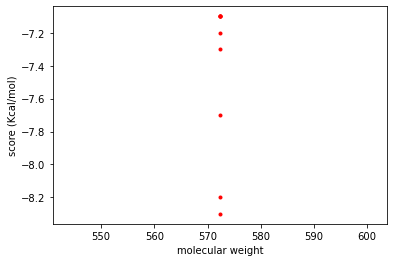

In [7]:

plt.plot(list(table['molecular weight']),
         list(table['score']), 'ro', marker='.')
plt.xlabel('molecular weight')
plt.ylabel('score (Kcal/mol)')


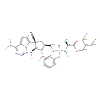

In [8]:
table['smiles'][0]


/tmp/ipykernel_56597/2991305477.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot((list(sort.index)), list(sort['score']), 'ro', marker='.')


Text(0, 0.5, 'score (Kcal/mol)')

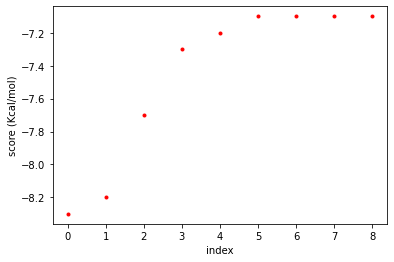

In [9]:
plt.plot((list(sort.index)), list(sort['score']), 'ro', marker='.')
plt.xlabel('index')
plt.ylabel('score (Kcal/mol)')
